In [21]:
from tensorflow import keras

In [22]:
from src.models import Sequential
from src.layers import *
from src.activation_functions import *
from src.loss_functions import *

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, roc_curve
from sklearn.metrics import roc_auc_score, f1_score, balanced_accuracy_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn import preprocessing

C:\Users\Jakub\PycharmProjects\neural_network_from_scratch\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


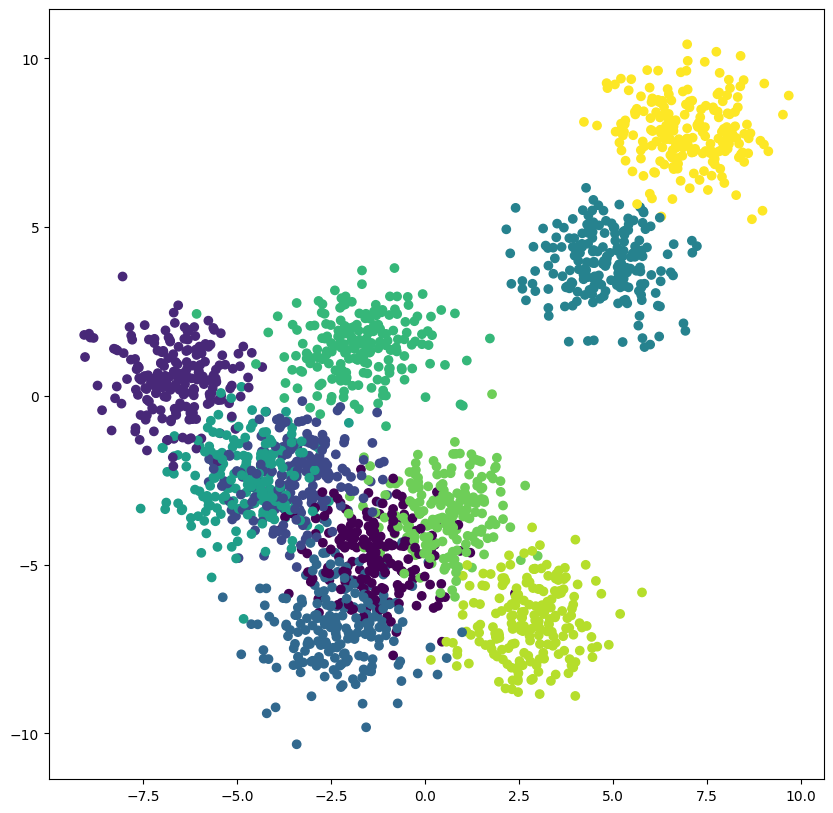

In [24]:
NOISE = 16
SAMPLES = 2425
SEED = 244825
CLASSES = 2
TRAIN_SPLIT = 0.8
TEST_SPLIT = 0.2
REPEATS = 100

X, y = datasets.make_blobs(n_samples=2000, centers=10)

og_y = y
y = y.reshape(y.shape[0], 1)


# from sklearn import preprocessing
#
# le = preprocessing.LabelEncoder()
# le.fit(y)
#
# y = le.transform(y)
from sklearn.preprocessing import OneHotEncoder

lb = OneHotEncoder(sparse=False)
# y = y.reshape(-1, 1)
lb.fit(y)

y = lb.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SPLIT, test_size=TEST_SPLIT,
                                                    random_state=SEED)

xx, yy = np.meshgrid(np.arange(X.min(), X.max(), 0.01),
                     np.arange(X.min(), X.max(), 0.01))

plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=og_y)


In [25]:
X[0]

array([ 1.11754115, -3.35682946])

In [26]:
model = Sequential(epochs=100, learning_rate=0.01, loss_function=CrossEntropy(), batch_size=32)

Batch size is not supported yet


In [27]:
model.add(Linear(n_inputs=len(X[0]), n_outputs=64))
model.add(Activation(ReLU()))
model.add(Linear(n_inputs=64, n_outputs=10))
model.add(Activation(Softmax()))

In [28]:
model.train(X_train, y_train)

Epoch: 0, Loss: 15242.011694664809
Epoch: 1, Loss: 18569.0689607038
Epoch: 2, Loss: 19903.41262750737
Epoch: 3, Loss: 20648.67496073726
Epoch: 4, Loss: 21373.048694174504
Epoch: 5, Loss: 22083.36333866352
Epoch: 6, Loss: 22616.873265735147
Epoch: 7, Loss: 23198.15636779661
Epoch: 8, Loss: 23868.941949299013
Epoch: 9, Loss: 24244.389222401274
Epoch: 10, Loss: 24542.224629995733
Epoch: 11, Loss: 24795.589886178113
Epoch: 12, Loss: 25214.10207255169
Epoch: 13, Loss: 25660.372389055836
Epoch: 14, Loss: 26052.098998155478
Epoch: 15, Loss: 26532.657817215593
Epoch: 16, Loss: 27311.022070010233
Epoch: 17, Loss: 28306.874547726293
Epoch: 18, Loss: 29252.609938554844
Epoch: 19, Loss: 30075.30268245045
Epoch: 20, Loss: 30518.551971392655
Epoch: 21, Loss: 30924.51352213211
Epoch: 22, Loss: 31072.145478905193
Epoch: 23, Loss: 31412.450137065003
Epoch: 24, Loss: 31834.051971090696
Epoch: 25, Loss: 33337.1936797491
Epoch: 26, Loss: 33448.59874345782
Epoch: 27, Loss: 33694.592839161625
Epoch: 28, Los

In [29]:
y_pred = model.predict(X_test)

In [30]:
np.sum(y_pred[0])

3.358135154449269e-08

In [31]:
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [32]:
y_pred2 = np.argmax(y_pred, axis=1)

In [33]:
y_test2 = np.argmax(y_test, axis=1)

Czulosc: 1.0
Swoistosc: 1.0
Accuracy: 1.0
F1 score: 0.8675
BA score: 0.8639172087637863


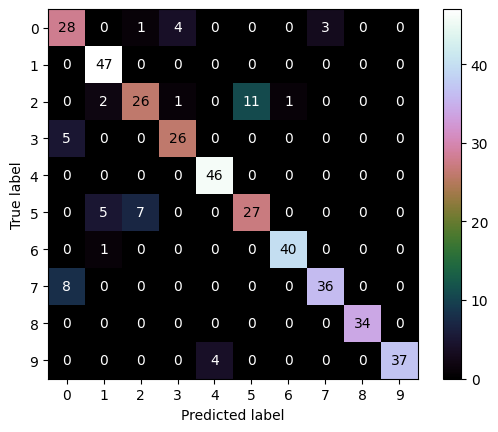

In [34]:
cm_model = confusion_matrix(y_test2, y_pred2)
tn_model = cm_model[0][0]
fn_model = cm_model[0][1]
tp_model = cm_model[1][1]
fp_model = cm_model[1][0]
ConfusionMatrixDisplay(cm_model).plot(cmap='cubehelix')

# fpr, tpr, roc_auc = roc_curve(y_test, y_pred)
#
# rok_model = RocCurveDisplay(fpr=fpr, tpr=tpr)
# rok_model.plot()

print("Czulosc:", tp_model / (tp_model + fn_model))
print("Swoistosc:", tn_model / (tn_model + fp_model))
print("Accuracy:", (tp_model + tn_model) / (tp_model + tn_model + fp_model + fn_model))

# print("ROC auc:", roc_auc_score(y_test, y_pred))
print("F1 score:", f1_score(y_test2, y_pred2, average='micro'))
print("BA score:", balanced_accuracy_score(y_test2, y_pred2))